Cargando datos en Pandas
========================

Objetivo
--------
La finalidad de este capítulo es mostrar como cargar datos desde un archivo tipo csv, pero **Pandas** soporta más tipo de archivos. Debido a que el módulo tiene estructudas de datos que facilitan la manipulación de los datos al leerse desde un archivo, entonces explico un poco sobre el módulo Numpy y las Series y DataFrame que son estruturas de datos en Pandas.

Algunas comparaciones con R
---------------------------
La primera tarea que yo analizar datos es evidentemente *cargar* los datos que proviene de alguna fuente( base de datos) o archivo. Considerando la semejanza de **Pandas** con el uso de **R**, para mi las primeras tareas después de cargar los datos es revisar propiedades como tamaño o *dim()*, leer los primeros o los últimos registros *head()* o *tail()*, explorar el tipo de variables que tienen la muestra de datos *struct()* o explorar la existencia de registros nulos o **NA**, ver el resumen de los estadísticos básicos de las variables. Desde mi punto de vista, conociendo esa primera información uno puede iniciar un análisis exploratorio mucho más robusto.

El módulo **Pandas** tiene estructuras de datos para procesar la información con nombre similar a las de **R**, son los **DataFrame**. Las librerías de R que permiten operar los datos del mismo modo que Pandas son *ddply* y *reshape2*, el resto de operaciones para manipular DataFrame tienen un equivalente en las dos tecnologías.


Algunas cosas previas a cargar datos.
------------------------------------

Debido a que al cargar los datos desde alguna archivo o fuente, ya sea en formato csv, excel, xml, json o desde algúna base Mysql, etc. Serán cargados en Ipython como Data.Frame o Series, pero estas estructuras en **Pandas** tienen como base el manejo de **matrices** con **Numpy**. Por eso comento algunas cosas sobre Numpy.

En resumen, creo que es bueno antes de cargar datos, saber algo sobre las estructuras de datos en Pandas y a su vez creo importante saber un poco sobre lo que permite la creación de las estructuras en Pandas, que es el módulo Numpy.

**Numpy**


En breve, este módulo permite el tratamiento de matrices y arrays, cuenta con funciones estándar de matemáticas, algunas funciones estadísticas básicas, permite la generación de números aleatorios, operaciones de álgebra lineal y análisis de Fourier, entre otras operaciones y funciones. Quizás esto no suena muy interesante, pero el módulo tiene la calidad suficiente para hacer cálculos no triviales y a buena velocidad, con respecto a **C** o **C++**.

Siempre los ejemplos que se hacen de Numpy explican cosas como: la contrucción de matrices y arrays, operaciones entre matrices y arrays, como usar la *vectorización* de las matrices, selección de filas y columnas, copia y eliminación de entradas, etc. En mi caso pienso que aprendo mejor con ejemplos de como usar algunas de las funciones o herramientas del módulo, que solo leyendo las teoria y operaciones. Una de las mejores fuentes para conocer Numpy es el tutorial de la página oficial de la librería.
*  Tutorial Numpy:  https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

Los 3 ejemplos son sencillos y muestran como usar Numpy para 3 tipos de problemas, uno tiene caracter de análisis numérico, calculos de una cadena de markov y el últmo es una aplicación de las cadenas de Markov (el algoritmo PageRank de manera rupestre).

**Regiones de Estabilidad Absoluta calculados con Numpy**

El concepto de región de estabilidad absoluta tiene su origen en análisis numérico, es un método por medio del cual se analiza la estabilidad de las soluciones de una ecuación diferencial ordinaria. No doy detalles mayores del problema, pero se puede leer el artículo de [Juan Luis Cano](http://pybonacci.org/2012/04/27/regiones-de-estabilidad-de-metodos-numericos-en-python/), y sobra decir que el código del ejemplo es original su publicación en su sitio.

Ejemplo
=======

~~~

 -*- coding: utf-8 -*-

* Región de estabilidad absoluta
* Juan Luis Cano Rodríguez

import numpy as np
def region_estabilidad(p, X, Y):
  
  """Región de estabilidad absoluta
     Computa la región de estabilidad absoluta de un método numérico, dados
     los coeficientes de su polinomio característico de estabilidad.
    Argumentos
    ----------
    p : function
        Acepta un argumento w y devuelve una lista de coeficientes
    X, Y : numpy.ndarray
        Rejilla en la que evaluar el polinomio de estabilidad generada por
        numpy.meshgrid
    Devuelve
    --------
    Z : numpy.ndarray
        Para cada punto de la malla, máximo de los valores absolutos de las
        raíces del polinomio de estabilidad
    Ejemplos
    --------
    >>> import numpy as np
    >>> x = np.linspace(-3.0, 1.5)
    >>> y = np.linspace(-3.0, 3.0)
    >>> X, Y = np.meshgrid(x, y)
    >>> Z = region_estabilidad(lambda w: [1,
    ... -1 - w - w ** 2 / 2 - w ** 3 / 6 - w ** 4 / 24], X, Y)  # RK4
    >>> import matplotlib.pyplot as plt
    >>> cs = plt.contour(X, Y, Z, np.linspace(0.05, 1.0, 9))
    >>> plt.clabel(cs, inline=1, fontsize=10)  # Para etiquetar los contornos
    >>> plt.show()
    """
    Z = np.zeros_like(X)
    w = X + Y * 1j
   
    for j in range(len(X)):
        for i in range(len(Y)):
            r = np.roots(p(w[i, j]))
            Z[i, j] = np.max(abs(r if np.any(r) else 0))
    return Z
~~~
Podemos guardar este código en un script o se puede cargar directamente a la consola, en caso de hacerlo en ipython se puede hacer uso del comando **%paste**.

In [1]:
#
# Región de estabilidad absoluta
# Juan Luis Cano Rodríguez
import numpy as np
def region_estabilidad(p, X, Y):
    """Región de estabilidad absoluta
    Computa la región de estabilidad absoluta de un método numérico, dados
    los coeficientes de su polinomio característico de estabilidad.
    Argumentos
    ----------
    p : function
        Acepta un argumento w y devuelve una lista de coeficientes
    X, Y : numpy.ndarray
        Rejilla en la que evaluar el polinomio de estabilidad generada por
        numpy.meshgrid
    Devuelve
    --------
    Z : numpy.ndarray
        Para cada punto de la malla, máximo de los valores absolutos de las
        raíces del polinomio de estabilidad
    Ejemplos
    --------
    >>> import numpy as np
    >>> x = np.linspace(-3.0, 1.5)
    >>> y = np.linspace(-3.0, 3.0)
    >>> X, Y = np.meshgrid(x, y)
    >>> Z = region_estabilidad(lambda w: [1,
    ... -1 - w - w ** 2 / 2 - w ** 3 / 6 - w ** 4 / 24], X, Y)  # RK4
    >>> import matplotlib.pyplot as plt
    >>> cs = plt.contour(X, Y, Z, np.linspace(0.05, 1.0, 9))
    >>> plt.clabel(cs, inline=1, fontsize=10)  # Para etiquetar los contornos
    >>> plt.show()
    """
    Z = np.zeros_like(X)
    w = X + Y * 1j
   
    for j in range(len(X)):
        for i in range(len(Y)):
            r = np.roots(p(w[i, j]))
            Z[i, j] = np.max(abs(r if np.any(r) else 0))
    return Z

Para ver un ejemplo de su uso, realiza lo siguiente:
*  Se define las regiones x e y.
*  Se define un polinomio para probar la definición de la región.
*  Se utiliza la función region_estabilidad y se grafica el resultado.

In [2]:
#Se define la región
x = np.linspace(-3.0, 1.5)
y = np.linspace(-3.0, 3.0)
X, Y = np.meshgrid(x, y)

In [3]:
#Se define el polinomio
def p(w):
       return [1, -1 - w - w ** 2 / 2 - w ** 3 / 6 - w ** 4 / 24]

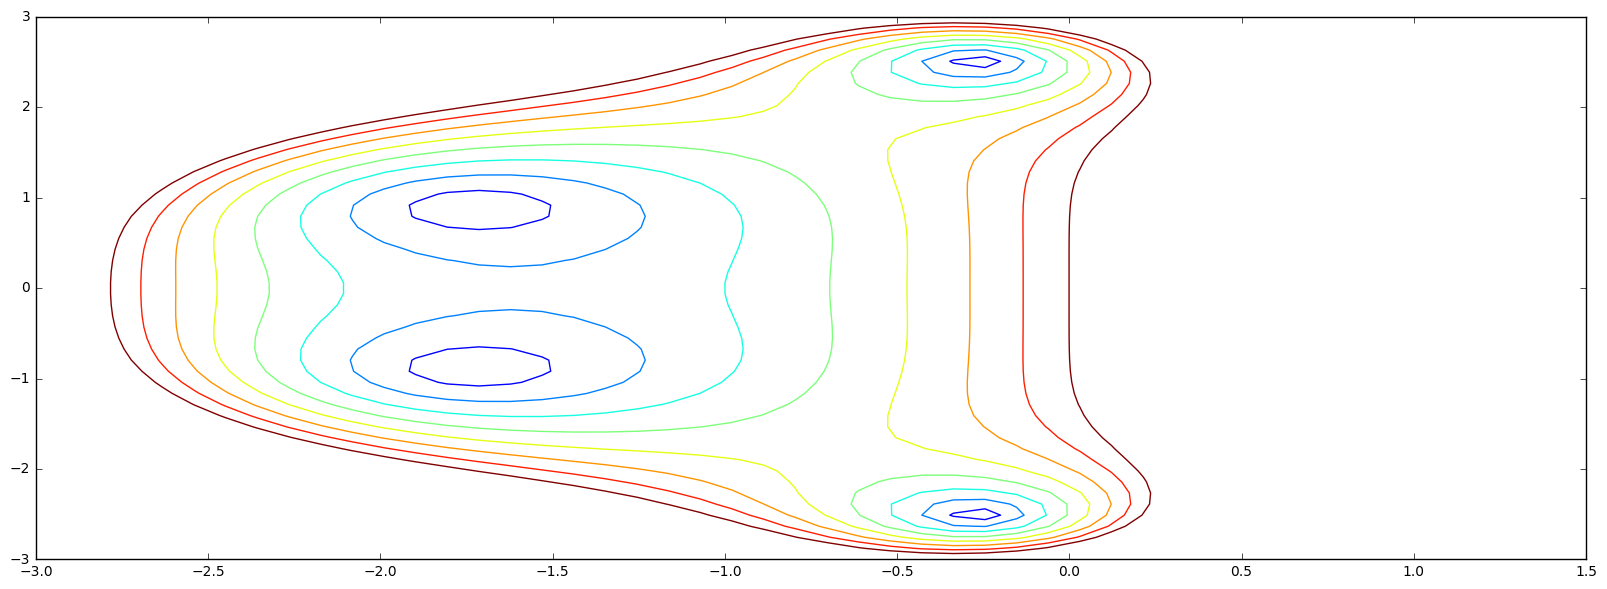

In [5]:
Z = region_estabilidad(p, X, Y)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,7)
plt.contour(X, Y, Z, np.linspace(0.0, 1.0, 9))
plt.show()

El ejemplo anterior muestra el uso de Numpy como una biblioteca o módulo que permite hacer manipulación de matrices y como la calidad del procesamiento numérico perminte considarar su uso en problemas de métodos numéricos.

**Problema del laberito con Numpy**

El problema tiene el mismo nombre que un ejemplo del uso del algoritmo Backtracking para solución de problemas por "fuerza bruta", respecto a esa técnica se puede consultar el brog de [JC Gómez](https://ic1800a2011.wordpress.com/2013/11/11/030-backtracking-el-problema-del-laberinto/).

El ejemplo que comparto tienen que ver más con el uso de [Cadenas de Markov](https://es.wikipedia.org/wiki/Cadena_de_M%C3%A1rkov), el ejemplo es solo para mostrar como funcionan y como se hace uso de ellas para resolver el problema con ciertos supuestos iniciales y como hacerlo con numpy.

Suponemos que se colocará un dispositivo que se puede desplazar y pasar de área como en el cuadro siguiente:
![Laberinto](Imagenes/Laberinto.png)
La idea es que puede pasar del cuadro 1 hacia el 2 o el 4, si empieza en el cuadro 2 puede pasar del 1 al 3, pero si inicia en el 5 solo puede pasar al 6, etc. 

Entonces lo que se plantea es que si inicia en el cuadro 1 y pasa al 2, eso solo depende de haber estado en el cuadro 1, si se pasa al cuadro 3 solo depende del estado 2, no de haber estado en el estado 1. Entonces la idea de los procesos de Markov es que para conocer si se pasará al cuadro 3 iniciando en el cuadro 1 solo se requiere conocer los pasos previos.

En lenguaje de probabilidad se expresa así:
\begin{align}
 P(X_{n}|X_{n-1},X_{n-2},...,X_{1}) = P(X_{n}|X_{n-1})\\\\[5pt]
\end{align}

Entonces los supuestos son que se tienen 6 posibles estados iniciales o lugares desde donde iniciar, el cuadro 1 hasta el cuadro 6. Se hace una matriz que concentra la información ordenada de la relación entre los posibles movimientos entre cuadros contiguos. Entonces la relación de estados es:

\begin{align}
 p_{ij}= P(X_{n}=j|X_{n-1}=i)\\\\[5pt]
\end{align}

Donde se refiere a la probabilidad de estar en el cuadro **j** si se estaba en el estado **i**, para el cuadro 2 las probabilidades serían:

\begin{align}
 p_{21}= P(X_{n}=1|X_{n-1}=2)\\\\[5pt]
 p_{23}= P(X_{n}=3|X_{n-1}=2)\\\\[5pt]
      0= P(X_{n}=4|X_{n-1}=2)\\\\[5pt]
      0= P(X_{n}=5|X_{n-1}=2)\\\\[5pt]
      0= P(X_{n}=6|X_{n-1}=2)\\\\[5pt]     
\end{align}

Visto como matriz se vería como:

\begin{array}{ccc}
p_{11} & p_{12} & p_{13} & p_{14} & p_{15} & p_{16} \\
p_{21} & p_{22} & p_{23} & p_{24} & p_{25} & p_{26} \\
p_{31} & p_{32} & p_{33} & p_{34} & p_{35} & p_{36}\\
p_{41} & p_{42} & p_{43} & p_{44} & p_{45} & p_{46}\\
p_{51} & p_{52} & p_{53} & p_{54} & p_{55} & p_{56}\\
p_{61} & p_{62} & p_{63} & p_{64} & p_{65} & p_{66}\end{array}

Matriz anterior se llama **matriz de transición**, para este ejemplo es de la forma siguiente:

\begin{array}{ccc}
\frac{1}{3} & \frac{1}{3}  & 0 & \frac{1}{3}  & 0 & 0 \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 \\
    0 & \frac{1}{3} & \frac{1}{3} & 0 & 0 & \frac{1}{3}\\
\frac{1}{2} & 0 & 0 & \frac{1}{2} & 0 & 0\\
 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2}\\
 0 & 0 & \frac{1}{3} & 0 & \frac{1}{3} & \frac{1}{3}\end{array}

Se tienen entonces si la probabilidad de iniciar en cualquier estado es 1/6, entonces se tienen que la probabilidad despues de dos movimientos o cambios será la matriz de transición multiplicada por si misma en dos ocasiones, se vería así:
Vector de estados iniciales:
\begin{align}
     v=(\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6})\\
\end{align}

En el primer estado sería:
\begin{align}
     v*M
\end{align}

En el segundo estado sería:
\begin{align}
     v*M^2
\end{align}

Asi lo que se tendrá es la probabilidad de estar en cualqueir cuadro para un segundo movimiento, hace esto en Numpy pensando en que es para procesar matrices resulta sencillo. Solo basta definir la matriz, hacer producto de matrices y vectores.

In [6]:
#Definición de la matriz
import numpy as np
M=np.matrix([[1.0/3.0,1.0/3.0,0,1.0/3.0,0,0],[1.0/3.0,1.0/3.0,1.0/3.0,0,0,0],[0,1.0/3.0,1.0/3.0,0,0,1.0/3.0],
             [1.0/2.0,0,0,1.0/2.0,0,0],[0,0,0,0,1.0/2.0,1.0/2.0],[0,0,1.0/3.0,0,1.0/3.0,1.0/3.0]])
M



matrix([[ 0.33333333,  0.33333333,  0.        ,  0.33333333,  0.        ,
          0.        ],
        [ 0.33333333,  0.33333333,  0.33333333,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.33333333,  0.33333333,  0.        ,  0.        ,
          0.33333333],
        [ 0.5       ,  0.        ,  0.        ,  0.5       ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,
          0.5       ],
        [ 0.        ,  0.        ,  0.33333333,  0.        ,  0.33333333,
          0.33333333]])

In [7]:
#Definición del vector de estados iniciales
v=np.array([1.0/3.0,1.0/3.0,1.0/3.0,1.0/3.0,1.0/3.0,1.0/3.0])

In [8]:
#Primer estado o movimiento
v*M

matrix([[ 0.38888889,  0.33333333,  0.33333333,  0.27777778,  0.27777778,
          0.38888889]])

In [9]:
#Segundo movimiento
v*M.dot(M)

matrix([[ 0.37962963,  0.35185185,  0.35185185,  0.26851852,  0.26851852,
          0.37962963]])

In [10]:
#Tercer Movimiento
v.dot(M).dot(M).dot(M).dot(M).dot(M).dot(M).dot(M)

matrix([[ 0.37537747,  0.37327818,  0.37327818,  0.25134435,  0.25134435,
          0.37537747]])

Si se procede ha seguir incrementando los estados o cambios se "estabiliza"; es decir, el cambio en la probabilidad de estar en la caja 1 después de tercer movimiento es **37.53%**, lo cual tiende a quedarse en **37.5%** al incrementar los movimientos.  

**Ejemplo de PageRank de manera rupestre, calcuado con Numpy**

El algoritmo para generar un Ranking en las páginas web fue desarrollado e implementado por los fundadores de Google, no profundizo en los detalles pero en general la idea es la siguiente:

*  Representar la Web como un gráfo dirigido.
*  Usar la matriz asociada a un grafo para analizar el comportamiento de la web bajo ciertos supuestos.
*  Agregar al modelo base lo necesario para que se adapate a la naturaleza de la web de mejor manera.

El primer objetivo es representar cada página como un vértice de un [grafo](https://es.wikipedia.org/wiki/Grafo) y una arista representa la relación de la página a otra página; es decir, si dentro de la página **A** se hace referencia a la página **B**, entonces se agrega una "flecha", por lo tanto un ejemplo sencillo lo representa el siguiente grafo:
![Grafo 1](Imagenes/PageRank1.png)

La imagen anterior representa un gráfo donde se simula que hay relación entre 3 páginas, la flecha indica el direccionamiento de una página a otra. Entonces para modelar la relación entre las páginas lo que se usa es [matriz de adyacencia](https://es.wikipedia.org/wiki/Matriz_de_adyacencia), esta matriz concentra la información de las relaciones entre nodos. La matriz adyacente de ese gráfo sería como:

\begin{array}{ccc}
.33 & .5 & 1 \\
.33 & 0 & 0 \\
.33 & .5 & 0 \end{array}

Esta matriz es una matriz de Markov por columnas, cada una suma 1, el objetivo es que se tenga un vector con el ranking del orden de las páginas por prioridad al iniciar la búsqueda en internet y después de hacer uso de la matriz se puede conocer cual es el orden de prioridad.

Así que suponiendo que cualquiera de las 3 páginas tienen la misma probabilidad de ser la página inicial, se tienen que el vector inicial es:

\begin{align}
     v=(.33,.33,.33)\\
\end{align}

Después de usar la matriz la ecuación que nos permitiría conocer el mejor ranking de las páginas sería:

\begin{align}
     v=M*v
\end{align}

Entonces el problema se pasa a resolver un problema de vectores propios y valores propios, por lo tanto el problema sería calcularlos.  
\begin{align}
     M*v=\lambda*v
\end{align}


In [11]:
import numpy as np
M=np.matrix([[.33,.5,1],[.33,0,0],[.33,.5,0]])
lambda1,v=np.linalg.eig(M)
lambda1,v

(array([ 0.99453684+0.j        , -0.33226842+0.23559302j,
        -0.33226842-0.23559302j]),
 matrix([[-0.85789293+0.j        , -0.70936247+0.j        , -0.70936247-0.j        ],
         [-0.28465981+0.j        ,  0.46882218+0.33241567j,
           0.46882218-0.33241567j],
         [-0.42777156+0.j        ,  0.23537727-0.33332868j,
           0.23537727+0.33332868j]]))

El ejemplo anterior tiene 3 vectores propios y 3 valores propios, pero no refleja el problema en general de la relación entre las páginas web, ya que podría suceder que una página no tienen referencias a ninguan otra salvo a si misma o tienen solo referencias a ella y ella a ninguna, ni a si misma. Entonces un caso más general sería representado como el gráfo siguiente:
![Grafo 1](Imagenes/PageRank2.png)

En el grafo se tiene un nodo **D** y **E**, los cuales muestran un comportamiento que no se reflejaba en el grafo anterior. El nodo **E** y **D** no tienen salidas a otros nodos o páginas.

La matriz asociada para este gráfo resulta ser la siguiente:

\begin{array}{ccccc}
.33 & .25 & 0.5 & 0 & 0 \\
.33 & 0 & 0 & 0 & 0 \\
.33 & .25 & 0 & 0 & 0\\
 0 & .25 & 0.5  & 1 & 0\\
 0 & .25 & 0 & 0 & 1 \end{array}
 
 Se observa que para esta matriz no cada columna tienen valor 1, ejemplo la correspondiente a la columna **D** tienen todas sus entradas 0. Entonces el algoritmo de PageRank propone modificar la matriz adyacencia y agregarle una matriz que la compensa.
 
 La ecuación del siguiente modo:
 
\begin{align}
     A=\beta*M + (1-\beta)*\frac{1}{n}*e*e^T
\end{align}

Lo que sucede con esta ecuación, es que las columnas como la correspiente el nodo **D** toman valores que en suma dan 1, en caso como el nodo **E** se "perturban" de modo que permite que el algoritmo no se quede antorado en ese tipo de nodos. Si se considera la misma hipótesis de que inicialmente se tienen la misma probabilidad de estar en cualquiera de las páginas (nodos) entonces se considera ahora solo un vector de tamaño 5 en lugar de 3, el cual se vería así:

\begin{align}
     v=(.33,.33,.33,.33,.33)\\
\end{align}

El coeficiente **beta** toma valores de entre 0.8 y 0.9, suelen considerarse 0.85 su valor o por lo menos es el que se suponía se usaba por parte de Google, en resumen este parámetros es de control. La letra **e** representa un vector de a forma *v=(1,1,1,1,1)*, el producto con su traspuesta genera una matriz cuadrada la cual al multiplicarse por *1/n* tiene una matriz de Markov.

La matriz A ya es objeto de poder calcular el vector y valor propio, sin entrar en detalle esta puede cumple condiciones del teorema de Perron y de Frobenius, lo cual en resumen implica que se busque calcular u obtener el "vector dominando". 

Pensando en el calculo de los vectores y valores propios para una matriz como la asociada al grafo de ejemplo resulta trivial el cálculo, pero para el caso de millones de nodos sería computacionalmente muy costoso por lo cual lo que se usa es hacer un proceso de aproximación el cual convege "rápido" y fue parte del secreto para que las busquedas y el ranking de las páginas fuera mucho más rápido.

El código de la estimación en numpy sería el siguente:

In [12]:
from __future__ import division
import numpy as np

#Se definen los calores de las constantes de control y las matrices requeridas
beta=0.85

#Matriz adyacente
M=np.matrix([[0.33,0.25,0.5,0,0],[.33,0,0,0,0],[0.33,0.25,0,0,0],[0,.25,.5,1,0],[0,.25,0,0,1]])

#Cantidad de nodos
n=M.shape[1]

#Matriz del modelo de PageRank
A=beta*M+((1-beta)*(1/n)*np.ones((5,5)))

#Se define el vector inicial del ranking
v=np.ones(5)/5

#Proceso de estimación por iteracciones
iterN=1

while True:
    v1=v
    v=v.dot(M)
    print "Interación %d\n" %iterN
    print v
    if not np.any((0.00001<np.abs(v-v1))):
            break
    else:        
     iterN=iterN+1

print "M*v\n" 
v.dot(M)

Interación 1

[[ 0.198  0.2    0.2    0.2    0.2  ]]
Interación 2

[[ 0.19734  0.1995   0.199    0.2      0.2    ]]
Interación 3

[[ 0.1966272  0.199085   0.19867    0.2        0.2      ]]
Interación 4

[[ 0.19614613  0.1988243   0.1983136   0.2         0.2       ]]
Interación 5

[[ 0.19578373  0.19861493  0.19807306  0.2         0.2       ]]
Interación 6

[[ 0.19551567  0.1984642   0.19789186  0.2         0.2       ]]
Interación 7

[[ 0.19531767  0.19835188  0.19775783  0.2         0.2       ]]
Interación 8

[[ 0.19517104  0.19826888  0.19765884  0.2         0.2       ]]
Interación 9

[[ 0.19506259  0.19820747  0.19758552  0.2         0.2       ]]
Interación 10

[[ 0.19498234  0.19816203  0.19753129  0.2         0.2       ]]
Interación 11

[[ 0.19492297  0.19812841  0.19749117  0.2         0.2       ]]
Interación 12

[[ 0.19487904  0.19810353  0.19746148  0.2         0.2       ]]
Interación 13

[[ 0.19484654  0.19808513  0.19743952  0.2         0.2       ]]
Interación 14

[[ 0.1948224

matrix([[ 0.19477459,  0.19804439,  0.1973909 ,  0.2       ,  0.2       ]])

Se tienen como resultado que en 17 iteraciones el algoritmo indica que el PageRank no es totalmente dominado por el nodo **E** y **D**, pese a que son las "páginas" que tienen mayor valor, pero las otras 3 resultan muy cercanas en importancia. Se aprecia como se va ajustando el valor conforme avanzan las etapas de los cálculos.

Data.Frame y Series
===================

Los dos elementos principales de **Pandas** son Data.Frame y Series. El nombre Data.Frame es igual que el que se usa en R project y en escencia tiene la misma finalidad de uso, para la carga y procesamiento de datos.

Los siguientes ejemplos son breves, para conocer con detalle las propiedades, operaciones y caracteristicas que tienen estos dos objetos se puede consultar el libro [Python for Data Analysis](https://www.amazon.com) o el sitio oficial del módulo [Pandas](https://www.pandas.pydata.org). 

Primero se carga el módulo y los objetos y se muestran como usarlos de manera sencilla.

In [1]:
#Se carga el módulo
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#Se construye una Serie, se agregan primero la lista de datos y después la lista de índices
datos_series=Series([1,2,3,4,5,6],index=['a','b','c','d','e','f'])

In [3]:
#Se muestra como carga los datos Pandas en la estrutura definida
datos_series

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [4]:
#Se visualizan los valores que se guardan en la estructura de datos
datos_series.values

array([1, 2, 3, 4, 5, 6])

In [5]:
#Se visualizan los valores registrados como índices
datos_series.index

Index([u'a', u'b', u'c', u'd', u'e', u'f'], dtype='object')

In [6]:
#Se seleccionan algún valor asociado al índice 'b'
datos_series['b']

2

In [6]:
#Se revisa si tienen datos nulos o NaN
datos_series.isnull()

a    False
b    False
c    False
d    False
e    False
f    False
dtype: bool

In [8]:
#Se calcula la suma acumulada, es decir 1+2,1+2+3,1+2+3+4,1+2+3+4+5,1+2+3+4+5+6
datos_series.cumsum()

a     1
b     3
c     6
d    10
e    15
f    21
dtype: int64

In [7]:
#Se define un DataFrame, primero se define un diccionario y luego de genera el DataFrame
datos={'Estado':['Guanajuato','Querétaro','Jalisco','Durango','Colima'],'Población':[5486000,1828000,7351000,1633000,723455],'superficie':[30607,11699,78588,123317,5627]}
Datos_Estados=DataFrame(datos)       

In [8]:
Datos_Estados

,Estado,Población,superficie
0,Guanajuato,5486000,30607
1,Querétaro,1828000,11699
2,Jalisco,7351000,78588
3,Durango,1633000,123317
4,Colima,723455,5627


In [11]:
#Se genrea de nuevo el DataFrame y lo que se hace es asignarle índice para manipular los datos
Datos_Estados=DataFrame(datos,index=[1,2,3,4,5])

In [9]:
Datos_Estados

,Estado,Población,superficie
0,Guanajuato,5486000,30607
1,Querétaro,1828000,11699
2,Jalisco,7351000,78588
3,Durango,1633000,123317
4,Colima,723455,5627


In [13]:
#Se selecciona una columna
Datos_Estados.Estado

1    Guanajuato
2     Querétaro
3       Jalisco
4       Durango
5        Colima
Name: Estado, dtype: object

In [10]:
#Otro modo de elegir la columna es del siguiente modo.
Datos_Estados['Estado']

0    Guanajuato
1     Querétaro
2       Jalisco
3       Durango
4        Colima
Name: Estado, dtype: object

In [15]:
#Se elige una fila, y se hace uso del índice que se definió para los datos
Datos_Estados.ix[2]

Estado        Querétaro
Población       1828000
superficie        11699
Name: 2, dtype: object

In [11]:
#Se selecciona más de una fila
Datos_Estados.ix[[3,4]]

,Estado,Población,superficie
3,Durango,1633000,123317
4,Colima,723455,5627


In [17]:
#Descripción estadística en general, la media, la desviación estándar, el máximo, mínimo, etc.
Datos_Estados.describe()

,Población,superficie
count,5.000000e+00,5.000000
mean,3.404291e+06,49967.600000
std,2.860029e+06,50011.671546
min,7.234550e+05,5627.000000
25%,1.633000e+06,11699.000000
50%,1.828000e+06,30607.000000
75%,5.486000e+06,78588.000000
max,7.351000e+06,123317.000000


In [12]:
#Se modifica el DataFrame , se agrega una nueva columna 
from numpy import nan as NA
Datos_Estados['Índice']=[1.0,4.0,NA,4.0,NA]

In [13]:
Datos_Estados

,Estado,Población,superficie,Índice
0,Guanajuato,5486000,30607,1.0
1,Querétaro,1828000,11699,4.0
2,Jalisco,7351000,78588,NaN
3,Durango,1633000,123317,4.0
4,Colima,723455,5627,NaN


In [20]:
#Se revisa si hay datos NaN o nulos
Datos_Estados.isnull()

,Estado,Población,superficie,Índice
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,True


In [14]:
#Pandas cuenta con herramientas para tratar los Missing Values, en esto se pueden explorar como con isnull() o 
#eliminar con dropna. En este caso de llena con fillna
Datos_Estados.fillna(0)

,Estado,Población,superficie,Índice
0,Guanajuato,5486000,30607,1.0
1,Querétaro,1828000,11699,4.0
2,Jalisco,7351000,78588,0.0
3,Durango,1633000,123317,4.0
4,Colima,723455,5627,0.0


Los ejemplos anteriores muestras que es muy sencillo manipular los datos con Pandas, ya sea con Series o con DataFrame. Para mayor detalle de las funciones lo recomendable es consultar las referencias mencionadas anteriormente.

Cargar datos desde diversos archivos y estadísticas sencillas.
--------------------------------------------------------------

In [16]:
#Se agraga a la consola de ipython la salida de matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(30,8)

In [17]:
#Se cargan los datos desde un directorio, se toma como headers los registros de la fila 0
datos=pd.read_csv('~/Documentos/Tutorial-Python/Datos/Mujeres_ingeniería_y_tecnología.csv', encoding='latin1')

In [18]:
#Se visualizan los primeros 10 registros
datos.head(10)

,ENTIDAD,CICLO,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
0,01 Aguascalientes,2010/2011,3842,35198,10.915393
1,02 Baja California,2010/2011,6614,78503,8.425156
2,03 Baja California Sur,2010/2011,1217,15503,7.850094
3,04 Campeche,2010/2011,2262,23275,9.718582
4,05 Coahuila,2010/2011,8776,74490,11.781447
5,06 Colima,2010/2011,1053,19367,5.437084
6,07 Chiapas,2010/2011,6093,81114,7.511650
7,08 Chihuahua,2010/2011,10923,93963,11.624788
8,09 Distrito Federal,2010/2011,49797,472104,10.547888
9,10 Durango,2010/2011,3865,34099,11.334643


In [19]:
#Se observa la forma de los datos o las dimensiones, se observa que son 160 filas y 5 columnas.
datos.shape

(160, 5)

In [20]:
#Se da una descripción del tipo de variables que se cargan en el dataFrame
datos.dtypes

ENTIDAD              object
CICLO                object
MUJERES_INSC_ING      int64
MAT_TOTAL_SUP         int64
%_MUJERES_EN_ING    float64
dtype: object

In [9]:
#Se puede visualizar las información de las colunnas de manera más completa
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
ENTIDAD             160 non-null object
CICLO               160 non-null object
MUJERES_INSC_ING    160 non-null int64
MAT_TOTAL_SUP       160 non-null int64
%_MUJERES_EN_ING    160 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.3+ KB


In [21]:
#Se hace un resumen estadístico global de las variables o columnas
datos.describe()

,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
count,160.000000,160.000000,160.000000
mean,7902.006250,102825.350000,7.751666
std,7889.680464,104905.660695,2.259843
min,770.000000,15503.000000,3.665607
25%,3158.500000,40868.000000,5.930021
50%,5952.500000,71109.500000,7.579092
75%,9071.750000,101274.500000,9.364771
max,49797.000000,581222.000000,12.891235


Viendo los datos que se tienen, es natural preguntarse algo al respecto. Lo sencillo es, *¿cuál es el estado que presenta mayor cantidad de inscripciones de mujeres a ingeniería?*, pero también se puede agregar a la pregunta anterior el preguntar en qué año o cíclo ocurrió eso.

Algo sencillo para abordar las anteriores preguntas construir una tabla que permita visualizar la relación entre las variables mencionadas.

In [22]:
#Se construye una tabla pivot para ordenar los datos y conocer como se comportó el total de mujeres 
#inscritas a ingenierías
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING')

CICLO,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015
ENTIDAD,,,,,
01 Aguascalientes,3842,2537,2892,3183,3677
02 Baja California,6614,5745,6244,6470,6830
03 Baja California Sur,1217,770,886,967,1083
04 Campeche,2262,2028,2111,2217,2310
05 Coahuila,8776,7119,7423,8044,8879
06 Colima,1053,827,977,1110,1266
07 Chiapas,6093,5046,5178,5181,4953
08 Chihuahua,10923,8575,8950,9038,9628
09 Distrito Federal,49797,31873,34382,36508,39301


In [30]:
#Se revisa cual son los 3 estados con mayor cantidad de inscripciones en el cíclo 2012/2013
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').sort_values(by='2012/2013')[-3:]

CICLO,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015
ENTIDAD,,,,,
30 Veracruz,23159,19601,20676,22485,24686
15 Mï¿½xico,27042,22470,23887,25379,27150
09 Distrito Federal,49797,31873,34382,36508,39301


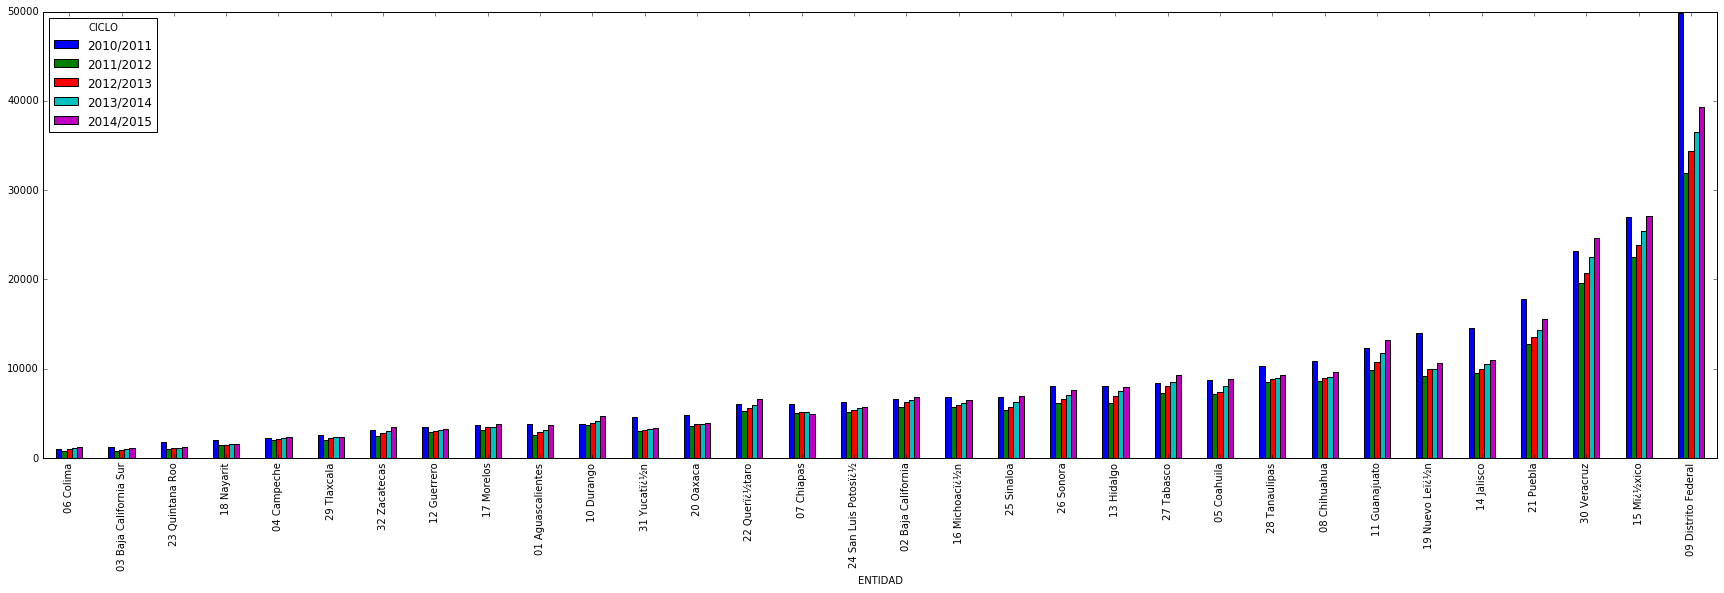

In [23]:
#Se grafican los resultados de la tabla anterior, pero ordenadas por el cíclo 2010/2011
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').sort_values(by='2010/2011').plot(kind='bar')

**Observación**: se vuelve evidente que las entidades federales o Estados donde se inscriben más mujeres a ingenierías son el Distrito Federal(Ciudad de México), Estado de México, Veracruz, Puebla, Guanajuato, Jalisco y Nuevo León. También se observa que en todos los estados en el periódo 2010/2011 la cantidad de mujeres que se inscribieron fue mayor y decayó significativamente en los años siguientes.

Esto responde a la pregunta : *¿cuál es el estado que presenta mayor cantidad de inscripciones de mujeres a ingeniería?*

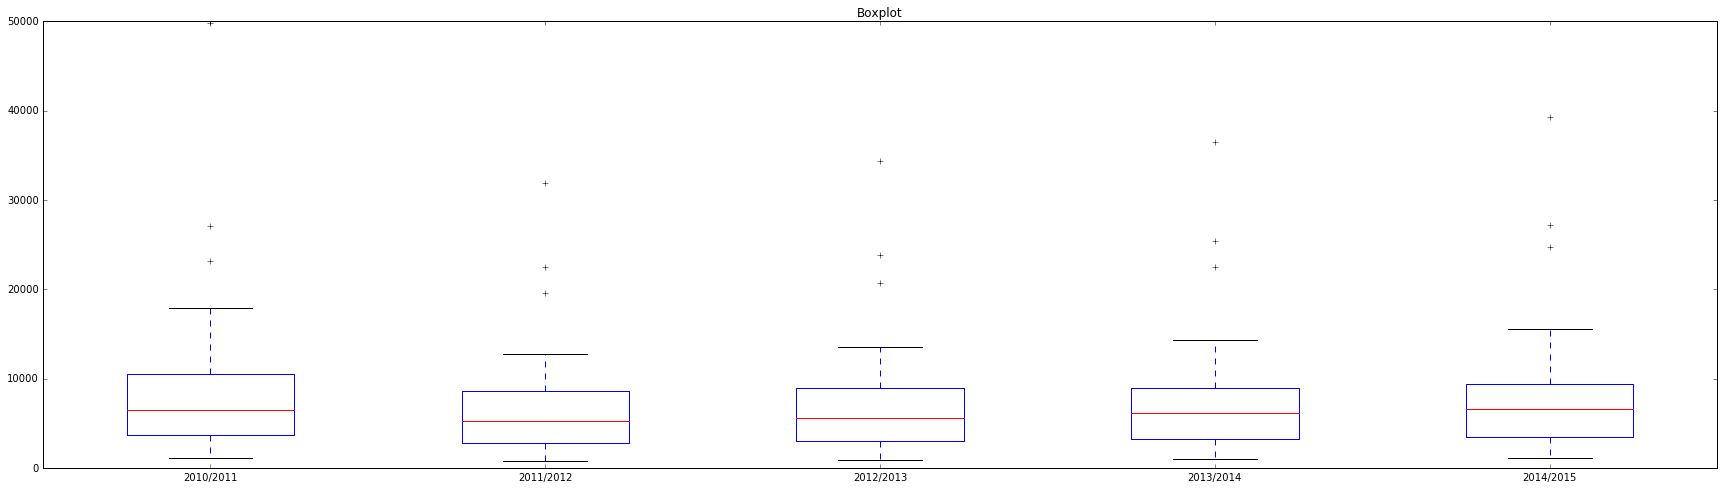

In [24]:
#Se grafica el boxplot para cada periodo 
datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING').plot(kind='box', title='Boxplot')

**Nota**: para estre breve análisis se hace uso de la construcción de tablas pivot en pandas. Esto facilidad analizar como se comportan las variables categóricas de los datos. En este ejemplo se muestra que el periódo 2010/2011 tuvo una media mayor de mujeres inscritas en ingeniarías, pero también se ve que la relación entre los estados fue más dispersa. Pero también se ve que los periódos del 2011/2012, 2012/2013 y 2013/2014 tienen comportamientos "similares".

Otras herramientas gráficas
---------------------------

Conforme evolucionó **Pandas** y el módulo se volvió más usado, la límitante que tenía a mi parecer, era el nivel de gráficos base. Para usar los DataFrame y Series en matplotlib se necesita definir los array o procesarlos de modo tal que puedan contruirse mejores gráficos. Matplotlib es un módulo muy potente, pero resulta mucho más engorroso hacer un análisis grafico. Si se ha usado R project para hacer una exploración de datos, resulta muy facil constrir los gráficos básicos y con librerías como **ggplot2** o **lattice** se puede hacer un análisis gráfico sencillo y potente.

Ante este problema se diseño una librería para complementar el análisis grafico, que es algo asi como "de alto nivel" al comprarla con matplotlib. El módulo se llama **seaborn**. 

Para los siguientes ejemplos uso los datos que se han analizado anteriormente.

In [25]:
#Se construye la tabla 
#Tabla1=datos.pivot('ENTIDAD','CICLO','MUJERES_INSC_ING')
datos.head()

,ENTIDAD,CICLO,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
0,01 Aguascalientes,2010/2011,3842,35198,10.915393
1,02 Baja California,2010/2011,6614,78503,8.425156
2,03 Baja California Sur,2010/2011,1217,15503,7.850094
3,04 Campeche,2010/2011,2262,23275,9.718582
4,05 Coahuila,2010/2011,8776,74490,11.781447


In [27]:
#Se carga la librería seaborn
import seaborn as sns
#sns.set(style="ticks")
#sns.boxplot(x="CICLO",y="MUJERES_INSC_ING",data=datos,palette="PRGn",hue="CICLO")

**Como cargar un json y analizarlo.**

En la siguiente se da una ejemplo de como cargar datos desde algún servicio web que regresa un arvhivo de tipo JSON. 

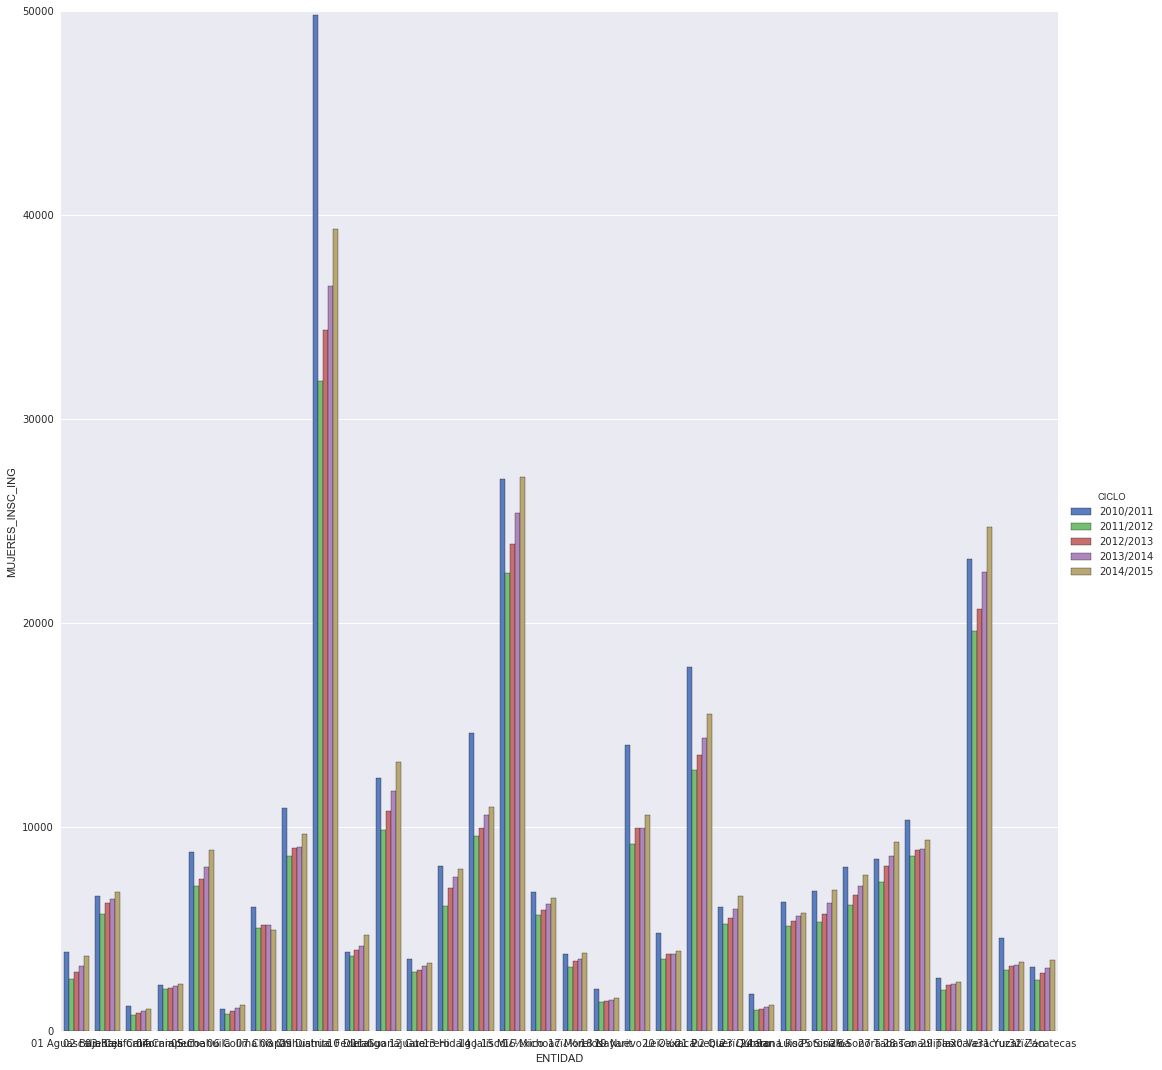

In [28]:
sns.factorplot(x="ENTIDAD",y="MUJERES_INSC_ING",hue="CICLO",data=datos,palette="muted", size=15,kind="bar")


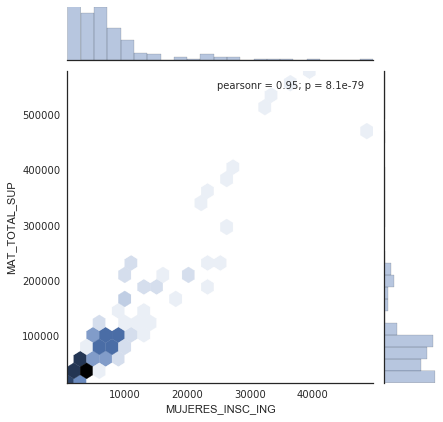

In [29]:
#Otra gráfica, se muestra el cruce entre las mujeres  que se inscriben en ingeniería y el total de mujeres
with sns.axes_style('white'):
    sns.jointplot('MUJERES_INSC_ING','MAT_TOTAL_SUP',data=datos,kind='hex')

Conclusión: 
-----------

Se observa que es facil el cargar datos desde un archivo, es lo usual, dar la ruta y el tipo de archivo se carga con la función correspondiente a ese tipo de archivo. También, con **Pandas** resulta sencillo hacer una tabla pivot, lo cual ayuda a organizar o explorar los datos y la relación entre al menos dos variables. 